In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
# 2.Load Dataset
data = pd.read_csv("viettri_quality.csv")
data

,date,pm25,pm10,o3,no2,so2,co
0,3/1/2019,44,17,29,2,9,4
1,3/2/2019,65,37,27,4,12,4
2,3/3/2019,81,38,2,1,1,2
3,3/4/2019,51,24,21,4,8,1
4,3/5/2019,43,7,23,1,12,4
...,...,...,...,...,...,...,...
1915,5/28/2024,38,24,35,1,15,5
1916,5/29/2024,38,17,41,7,15,10
1917,5/30/2024,28,8,11,1,15,1
1918,5/31/2024,12,12,16,1,16,7


In [3]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1920 non-null   object
 1   pm25    1920 non-null   int64 
 2   pm10    1920 non-null   int64 
 3   o3      1920 non-null   int64 
 4   no2     1920 non-null   int64 
 5   so2     1920 non-null   int64 
 6   co      1920 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 105.1+ KB


,pm25,pm10,o3,no2,so2,co
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,42.395313,22.470833,17.391667,7.528125,9.497917,3.961979
std,31.665288,16.124166,12.907283,4.971229,6.526731,2.516048
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,10.000000,8.750000,3.000000,4.000000,2.000000
50%,35.000000,20.000000,15.000000,7.000000,9.000000,4.000000
75%,59.000000,32.000000,24.000000,11.000000,14.000000,6.000000
max,178.000000,94.000000,114.000000,35.000000,27.000000,22.000000


In [4]:
#Chọn thuộc tính
data = data[['pm25']]
data = data.dropna() 
data = data.reset_index(drop=True) 
data

,pm25
0,44
1,65
2,81
3,51
4,43
...,...
1915,38
1916,38
1917,28
1918,12


<Axes: >

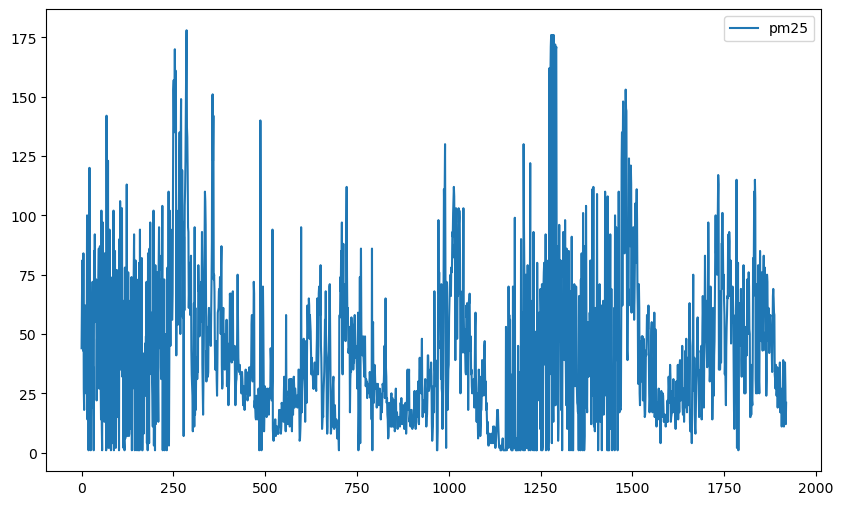

In [5]:
data.plot(figsize=(10,6))

In [6]:
# 2. Đọc file dữ liệu và chia train test theo tỉ lệ 7:3
train_size = int(0.9 * len(data))
test_size = int(0.1 * len(data))

# Chia dữ liệu thành các tập
train_data = data[:train_size]
test_data = data[train_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))


Train data size: 1728
Test data size: 192


In [7]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['pm25'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [8]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['pm25'])
y_pred = model.predict(x_test)


In [9]:
#5 Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index+1, stop=last_index+31, step=1)

# Tạo mảng 30 ngày tiếp theo
x_next_30_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Dự đoán
y_next_30_days = model.predict(x_next_30_days)

# In ra dự đoán giá trong 90 ngày tiếp theo
print('Predicted closing prices for the next 90 days:')
print(y_next_30_days)

Predicted closing prices for the next 90 days:
[34.58452049 34.57812657 34.57173265 34.56533873 34.55894481 34.55255088
 34.54615696 34.53976304 34.53336912 34.5269752  34.52058127 34.51418735
 34.50779343 34.50139951 34.49500559 34.48861166 34.48221774 34.47582382
 34.4694299  34.46303598 34.45664205 34.45024813 34.44385421 34.43746029
 34.43106637 34.42467244 34.41827852 34.4118846  34.40549068 34.39909676
 34.39270283 34.38630891 34.37991499 34.37352107 34.36712715 34.36073322
 34.3543393  34.34794538 34.34155146 34.33515754 34.32876361 34.32236969
 34.31597577 34.30958185 34.30318793 34.296794   34.29040008 34.28400616
 34.27761224 34.27121832 34.26482439 34.25843047 34.25203655 34.24564263
 34.23924871 34.23285478 34.22646086 34.22006694 34.21367302 34.2072791
 34.20088517 34.19449125 34.18809733 34.18170341 34.17530949 34.16891556
 34.16252164 34.15612772 34.1497338  34.14333988 34.13694595 34.13055203
 34.12415811 34.11776419 34.11137027 34.10497634 34.09858242 34.0921885
 34.08

In [10]:
# 6. Tính RMSE
test_rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print('Testing RMSE:', test_rmse)

# 7. Tính MAPE
test_mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
print('\nTesting MAPE:', test_mape)

# 8. Tính MAE
test_mae = np.mean(np.abs(y_test - y_pred))
print("\nMAE:", test_mae)



Testing RMSE: 29.828128433794525

Testing MAPE: 79.527041386785

MAE: 23.58891255103373


In [11]:
test_data.index

RangeIndex(start=1728, stop=1920, step=1)

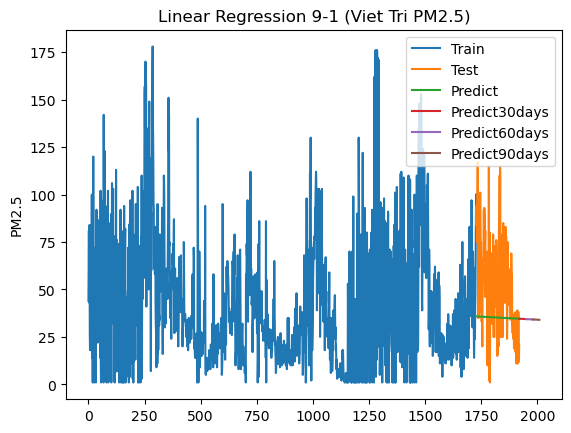

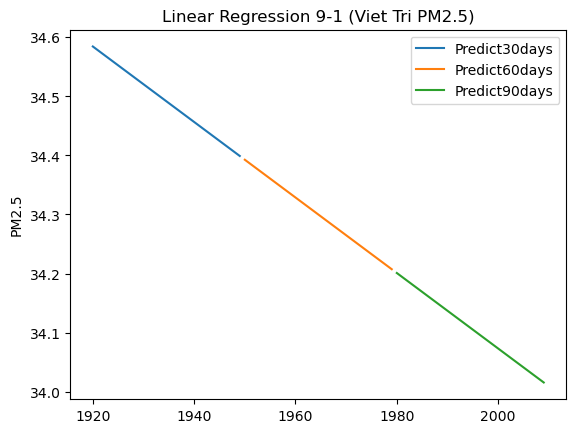

In [12]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)


last_data = pd.RangeIndex(start=last_index+1, stop=last_index+31, step=1)
plt.plot(last_data,y_next_30_days[0:30])

last_data = pd.RangeIndex(start=last_index+31, stop=last_index+61, step=1)
plt.plot(last_data,y_next_30_days[30:60])

last_data = pd.RangeIndex(start=last_index+61, stop=last_index+91, step=1)
plt.plot(last_data,y_next_30_days[60:90])
plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title('Linear Regression 9-1 (Viet Tri PM2.5)')
plt.ylabel('PM2.5')
plt.show()


#DỰ đians 90 ngày
last_data = pd.RangeIndex(start=last_index+1, stop=last_index+31, step=1)
plt.plot(last_data,y_next_30_days[0:30])

last_data = pd.RangeIndex(start=last_index+31, stop=last_index+61, step=1)
plt.plot(last_data,y_next_30_days[30:60])

last_data = pd.RangeIndex(start=last_index+61, stop=last_index+91, step=1)
plt.plot(last_data,y_next_30_days[60:90])
plt.legend(['Predict30days', 'Predict60days', 'Predict90days'])
plt.title('Linear Regression 9-1 (Viet Tri PM2.5)')
plt.ylabel('PM2.5')
plt.show()

